In [2]:
import os 
import sys

import backtrader as bt
import pandas as pd
import pyfolio as pf

/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# 取得當前檔案的所在目錄
current_dir = os.path.dirname(os.path.abspath(__name__))
parent_dir1 = os.path.abspath(os.path.join(current_dir, ".."))

In [4]:
current_notebook_dir = os.getcwd()
project_root_path = os.path.dirname(os.path.dirname(current_notebook_dir))
sys.path.append(project_root_path)

import Chapter1.utils as chap1_utils

In [5]:
chap1_utils.finlab_login()

輸入成功!


In [6]:
analysis_period_start_date = "2017-05-16"
analysis_period_end_date = "2021-05-15"

In [7]:
top_N_stocks = chap1_utils.get_top_stocks_by_market_value(
    excluded_industry=[
        "金融業",
        "金融保險業",
        "存托憑證",
        "建材營造",
    ],
    pre_list_date="2017-01-03"
)

Your version is 1.5.0, please install a newer version.
Use "pip install finlab==1.5.3" to update the latest version.


Due to your status as a free user, the most recent data has been shortened or limited.
Daily usage: 0.9 / 500 MB - company_basic_info


In [8]:
len(top_N_stocks)

767

In [9]:
# 取得指定股票代碼列表在給定日期範圍內的每日 OHLCV 數據 (Open, High, Low, Close, Volumn)
all_stock_data = chap1_utils.get_daily_OHLCV_data(
    stock_symbols=top_N_stocks,
    start_date=analysis_period_start_date,
    end_date=analysis_period_end_date
)
all_stock_data["datetime"] = all_stock_data["datetime"].astype(str)
all_stock_data["asset"] = all_stock_data["asset"].astype(str)

/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Q

In [10]:
all_stock_data

,Open,High,Low,Close,Volume,datetime,asset
0,17.247242,17.395926,17.197681,17.395926,12148541,2017-05-16,1101
1,17.296805,17.321586,17.172902,17.247244,6210221,2017-05-17,1101
2,17.123339,17.247242,17.024217,17.222462,2288047,2017-05-18,1101
3,17.148120,17.172900,17.098558,17.098558,2978676,2017-05-19,1101
4,17.272021,17.272021,17.048996,17.148119,2313878,2017-05-22,1101
...,...,...,...,...,...,...,...
746154,106.380017,114.042984,106.380017,110.436882,20742937,2021-05-10,9958
746155,109.535348,113.141450,100.069330,104.576958,16102417,2021-05-11,9958
746156,104.576957,105.478482,94.209414,95.110939,13411871,2021-05-12,9958
746157,91.504842,98.266283,88.349502,95.561707,7893400,2021-05-13,9958


In [11]:
# 指定各個季度下要使用的因子名稱。
# name 對應的是每個季度的因子名稱
# corr 對應的是因子值與未來收益的關係(根據單因子Alphalens分析結果)
select_rank_factor_dict = {
    "2017-Q1": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q2": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q3": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q4": {"name": "稅後淨利成長率", "corr": True},
    "2018-Q1": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q2": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q3": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q4": {"name": "稅前淨利成長率", "corr": True},
    "2019-Q1": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q2": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q3": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q4": {"name": "稅後淨利成長率", "corr": True},
    "2020-Q1": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q2": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q3": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q4": {"name": "稅前淨利成長率", "corr": True},
}

In [12]:
from typing import cast, List

# 準備因子數據，將各季度的因子數據進行排序
all_factor_data = pd.DataFrame()
for quarter, factor in select_rank_factor_dict.items():
    # 將季度字串轉換為起始和結束日期
    start_date, end_date = chap1_utils.convert_quarter_to_dates(quarter)
    # 生成該季度的交易日範圍
    trading_days = pd.date_range(start=start_date, end=end_date)
    # 取得因子數據，並按照股票代碼和日期進行排序與填補
    quarter_factor_data = (
        chap1_utils.get_factor_data(
            stock_symbols=top_N_stocks,
            factor_name=factor["name"],
            trading_days=list(trading_days),
            # trading_days=cast(List[pd.DatetimeIndex], list(trading_days))
        )
        .reset_index()
        .assign(factor_name=factor["name"])
        .sort_values(by=["asset", "datetime"])
        .groupby("asset", group_keys=False)
        .apply(lambda group: group.ffill())
        .dropna()
    )
    # 根據因子值進行股票排序: 由小到大(positive_corr True) or 由大到小(positive_corr=False)
    quarter_factor_data = chap1_utils.rank_stocks_by_factor(
        factor_df=quarter_factor_data,
        positive_corr=factor["corr"], # 根據因子相關性決定排序方向
        rank_column="value", # 用來排序的欄位名稱
        rank_result_column="rank", # 儲存排序結果的欄位名稱
    ).drop(columns=["value"])
    # 合併該季度的因子數據
    all_factor_data = pd.concat([all_factor_data, quarter_factor_data])

# 重設索引並將日期與股票代碼轉換為字串格式
all_factor_data = all_factor_data.reset_index(drop=True)
all_factor_data["datetime"] = all_factor_data["datetime"].astype(str)
all_factor_data["asset"] = all_factor_data["asset"].astype(str)


Daily usage: 2.3 / 500 MB - fundamental_features:稅後淨利成長率
Daily usage: 4.8 / 500 MB - etl:financial_statements_deadline
Daily usage: 31.2 / 500 MB - price:收盤價


/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill())
/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill())
/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:2

Daily usage: 32.7 / 500 MB - fundamental_features:稅前淨利成長率


/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill())
/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill())
/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/2907721936.py:2

In [23]:
print(pd.date_range(start="2020-01-01", end="2021-12-31"))

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')


In [15]:
print(all_factor_data)
print(type(all_factor_data))

           datetime asset factor_name   rank
0        2017-05-16  1101     稅後淨利成長率  751.0
1        2017-05-17  1101     稅後淨利成長率  751.0
2        2017-05-18  1101     稅後淨利成長率  751.0
3        2017-05-19  1101     稅後淨利成長率  751.0
4        2017-05-20  1101     稅後淨利成長率  751.0
...             ...   ...         ...    ...
1105972  2021-05-11  9958     稅前淨利成長率  559.0
1105973  2021-05-12  9958     稅前淨利成長率  559.0
1105974  2021-05-13  9958     稅前淨利成長率  559.0
1105975  2021-05-14  9958     稅前淨利成長率  559.0
1105976  2021-05-15  9958     稅前淨利成長率  559.0

[1105977 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [16]:
# 將因子數據與股價數據進行合併
all_stock_and_factor_data = pd.merge(
    all_stock_data, all_factor_data, on=["datetime", "asset"], how="outer"
)

# 按股票代碼和日期排序，並填補遺失值
all_stock_and_factor_data = (
    all_stock_and_factor_data.sort_values(by=["asset", "datetime"])
    .groupby("asset", group_keys=False)
    .apply(lambda group: group.ffill())
    .reset_index(drop=True)
)

/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/3511399013.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda group: group.ffill())
/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_78897/3511399013.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.ffill())


In [26]:
all_stock_and_factor_data

,Open,High,Low,Close,Volume,datetime,asset,factor_name,rank
0,17.247244,17.395927,17.197683,17.395927,12148541.0,2017-05-16,1101,稅後淨利成長率,751.0
1,17.296805,17.321586,17.172902,17.247244,6210221.0,2017-05-17,1101,稅後淨利成長率,751.0
2,17.123339,17.247242,17.024217,17.222462,2288047.0,2017-05-18,1101,稅後淨利成長率,751.0
3,17.148122,17.172902,17.098560,17.098560,2978676.0,2017-05-19,1101,稅後淨利成長率,751.0
4,17.148122,17.172902,17.098560,17.098560,2978676.0,2017-05-20,1101,稅後淨利成長率,751.0
...,...,...,...,...,...,...,...,...,...
1115702,109.535356,113.141458,100.069338,104.576965,16102417.0,2021-05-11,9958,稅前淨利成長率,559.0
1115703,104.576957,105.478482,94.209414,95.110939,13411871.0,2021-05-12,9958,稅前淨利成長率,559.0
1115704,91.504842,98.266283,88.349502,95.561707,7893400.0,2021-05-13,9958,稅前淨利成長率,559.0
1115705,98.266283,100.970860,94.209418,95.561707,6355101.0,2021-05-14,9958,稅前淨利成長率,559.0


In [ ]:
# 定義回測資料格式，新增排名資料
class PandasDataWithRank(bt.feeds.PandasData):
    params = (
        ("datetime", "datetime"), # 日期欄位
        ("open", "Open"), # 開盤價欄位
        ("high", "High"), # 最高價欄位
        ("low", "Low"), # 最低價欄位
        ("close", "Close"), # 收盤價欄位
        ("volume", "Volume"), # 成交量欄位
        ("rank", "rank"), # 排名欄位
        ("openinterest", -1), # 持倉量欄位（不使用）
    )
    # 新增因子排名這條數據線
    lines = ("rank",)
    

In [34]:
# 定義策略：根據因子排名買入和賣出股票
class FactorRankStrategy(bt.Strategy):
    # 策略參數：要買入和賣出的股票數量，及每檔固票的交易金額
    params = (
        ("buy_n", None), # 需要買入的股票數量
        ("sell_n", None), # 需要賣出的股票數量
        ("each_cash", None), # 每檔股票交易的金額
    )

    def __init__(self):
        self.stocks = self.datas # 將所有股票數據儲存在 self.stocks 變數中
        self.buy_positions = set() # 紀錄已購買的股票名稱
        self.sell_positions = set() # 紀錄已賣出的股票名稱

    def next(self):
        # 取得當天所有股票的因子排名: ex: {stock1: 1, stock2: 2}
        ranks = {data._name: data.rank[0] for data in self.stocks}
        # 根據排名從低到高排序: 排名越小的因子值越小, 排名越大的因子值越大
        sorted_ranks = sorted(ranks.items(), key=lambda x: x[1])

        # 取得排名最高的 buy_n 個股票 (要買入的股票)
        if self.params.buy_n:
            buy_n_list = sorted_ranks[-self.params.buy_n:]
            buy_n_names = [name for name, rank in buy_n_list] # 提取股票名稱
        if self.params.sell_n:
            sell_n_list = sorted_ranks[: self.params.sell_n]
            sell_n_names = [name for name, rank in sell_n_list] # 提取股票名稱

        # 進行買入與賣出操作
        for data in self.stocks:
            # 取得當前股票名稱
            name = data._name
            # 取得當前股票的收盤價
            close_price = data.close[0]
            # 計算每檔固票的交易股數
            size = int(self.params.each_cash / close_price)
            # 1. 處理賣出（做空）操作
            if self.params.sell_n:
                if name in self.sell_positions and name not in sell_n_names:
                    # 如果股票已經賣出且不在賣出清單，則平倉
                    self.close(data)
                    self.sell_positions.remove(name)
                elif name not in self.sell_positions and name in sell_n_names:
                    # 如果股票在賣出清單中，則賣出
                    self.sell(data, size=size)
                    self.sell_positions.add(name)
            
            # 2. 處理買入（做多）操作
            if self.params.buy_n:
                if name in self.buy_positions and name not in buy_n_names:
                    # 如果股票已經買入且不在買入清單，則平倉
                    self.close(data)
                    self.buy_positions.remove(name)
                elif name not in self.buy_positions and name in buy_n_names:
                    # 如果股票在買入清單中，則買入
                    self.buy(data, size=size)
                    self.buy_positions.add(name)

In [37]:
# 設定回測引擎
cerebro = bt.Cerebro()
# 加入交易策略 FactorRankStrategy, 設定策略參數：
# buy_n: 每次要買入的股票數量(20檔)
# sell_n: 每次要賣出的股票數量(20檔)
# each_cash: 每檔股票的交易金額，這裡是總資金的90%除以40檔股票，確保每檔股票有足夠資金配置
cerebro.addstrategy(
    FactorRankStrategy, buy_n=20, sell_n=20, each_cash=2000_0000 * 0.9 / 40
)
# 依序加入每檔股票的數據到回測引擎中
stock_list = list(set(all_stock_and_factor_data["asset"]))
for stock in stock_list:
    data = all_stock_and_factor_data[all_stock_and_factor_data["asset"]== stock]
    data = data.drop(columns=["asset", "factor_name"]) # 移除不必要欄位
    data["datetime"] = pd.to_datetime(data["datetime"]) # 日期欄位轉為 datetime 格式
    data = data.dropna().sort_values(by=["datetime"]).reset_index(drop=True)

    if data.empty:
        print(f"警告：股票 {stock} 的數據為空，請跳過。")
        continue

    data = PandasDataWithRank(dataname=data) # 使用自訂的數據格式 PandasDataWithRank
    cerebro.adddata(data, name=stock) # 加入數據到回測引擎

# 設定初始資金為 2000 萬元
cerebro.broker.set_cash(2000_0000)
# 設定每筆交易手續費為 0.1%
cerebro.broker.setcommission(commission=0.001)
# 加入 Pyfolio 分析器，用於生成投資組合的性能分析報告
cerebro.addanalyzer(bt.analyzers.PyFolio)
# 運行策略
results = cerebro.run()


警告：股票 911622 的數據為空，請跳過。
警告：股票 9110 的數據為空，請跳過。
警告：股票 910322 的數據為空，請跳過。
警告：股票 911868 的數據為空，請跳過。
警告：股票 9136 的數據為空，請跳過。
警告：股票 912000 的數據為空，請跳過。
警告：股票 910861 的數據為空，請跳過。
警告：股票 911608 的數據為空，請跳過。
警告：股票 9103 的數據為空，請跳過。
警告：股票 9105 的數據為空，請跳過。


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.105%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2017-05-16
End date,2021-05-15
Total months,69
,Backtest
Annual return,-7.105%
Cumulative returns,-34.774%
Annual volatility,17.832%
Sharpe ratio,-0.32
Calmar ratio,-0.11
Stability,0.07
Max drawdown,-63.051%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.05,2019-07-21,2021-04-08,NaT,NaN
1,4.98,2018-07-29,2018-10-25,2018-12-04,92
2,3.60,2017-05-16,2017-06-20,2017-11-01,122
3,3.27,2018-01-08,2018-03-01,2018-03-27,57
4,2.30,2019-04-18,2019-05-16,2019-07-03,55


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
New Normal,0.02%,-1.09%,1.81%
Covid,-0.12%,-12.85%,12.27%


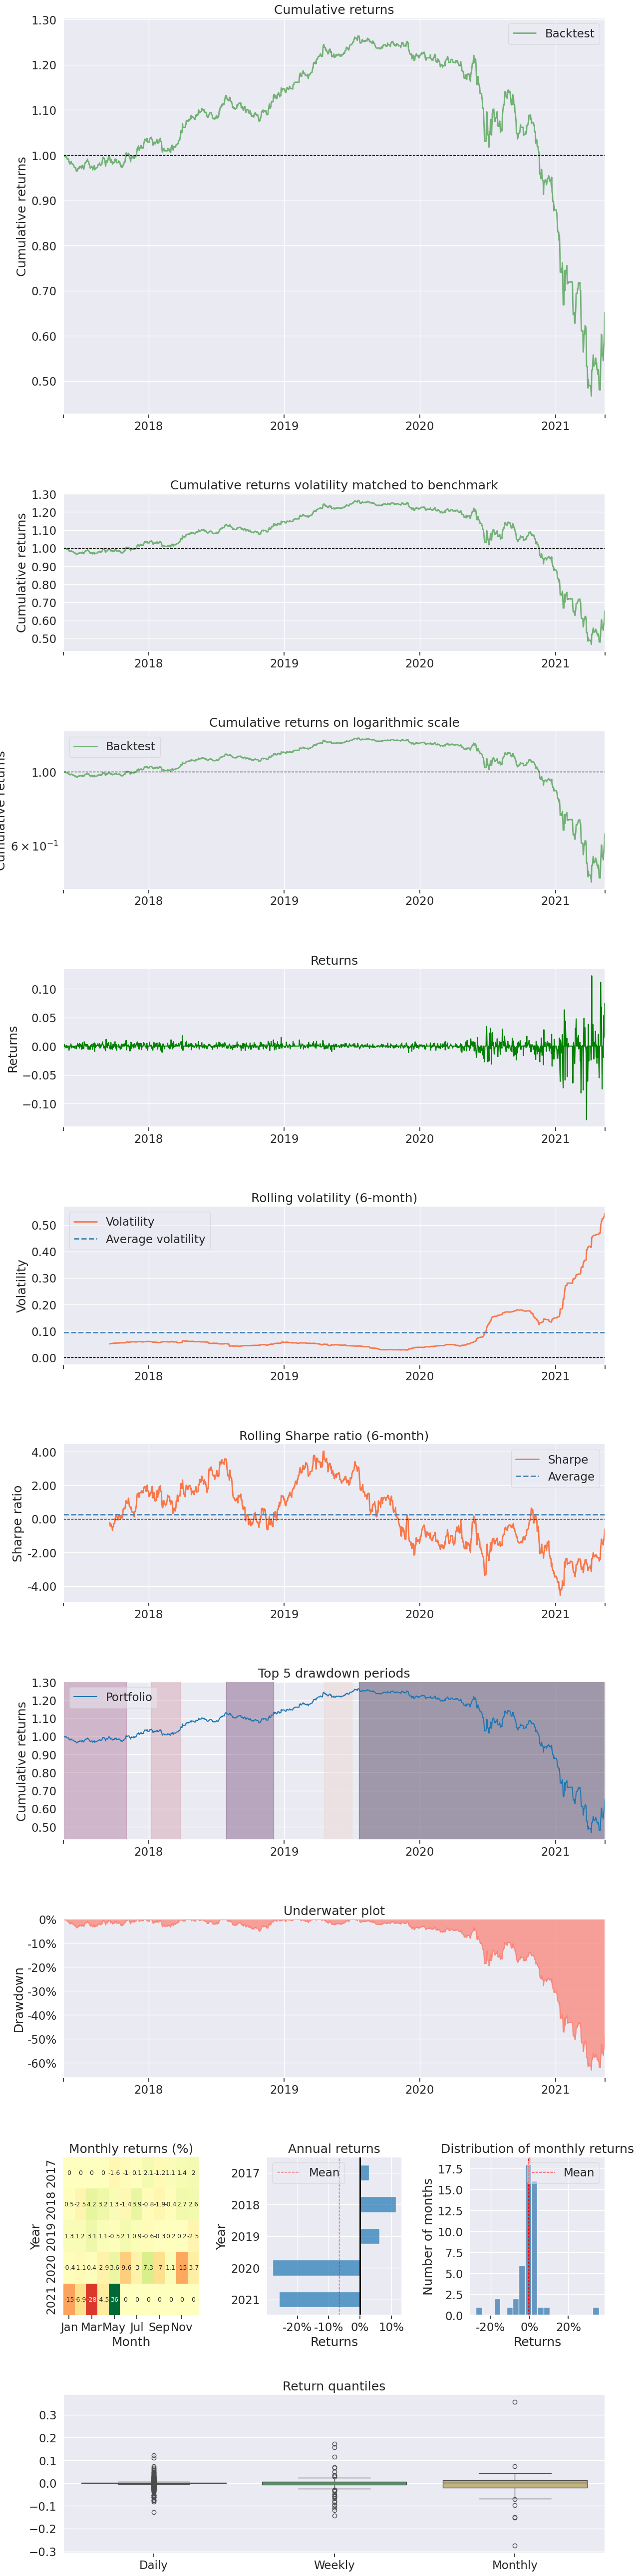

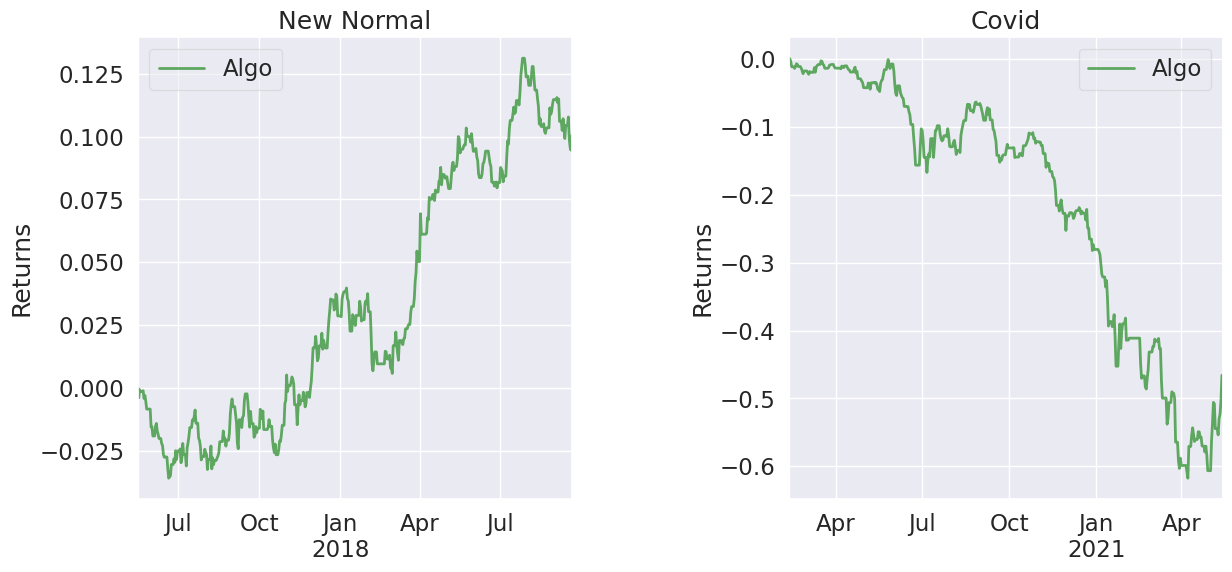

In [38]:
# 取得策略結果並生成投資組合分析報告
strat = results[0] # 取得回測結果中的第一個策略
pyfoliozer = strat.analyzers.getbyname("pyfolio")
(
    returns, 
    positions,
    transactions,
    gross_lev,
) = pyfoliozer.get_pf_items()
# 使用 PyFolio 生成完整的投資組合表現分析報告
pf.create_full_tear_sheet(returns)

輸入成功!


/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:476: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pd.DataFrame(yf.download(symbol, start=start_date, end=end_date)).droplevel(
[*********************100%***********************]  1 of 1 completed
/Users/houguanyu/Documents/code/python/stock/Q

Start date,2017-05-16
End date,2021-05-15
Total months,69
,Backtest
Annual return,-7.105%
Cumulative returns,-34.774%
Annual volatility,17.832%
Sharpe ratio,-0.32
Calmar ratio,-0.11
Stability,0.07
Max drawdown,-63.051%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.05,2019-07-21,2021-04-08,NaT,NaN
1,4.98,2018-07-29,2018-10-25,2018-12-04,92
2,3.60,2017-05-16,2017-06-20,2017-11-01,122
3,3.27,2018-01-08,2018-03-01,2018-03-27,57
4,2.30,2019-04-18,2019-05-16,2019-07-03,55


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
New Normal,0.02%,-1.09%,1.81%
Covid,-0.12%,-12.85%,12.27%


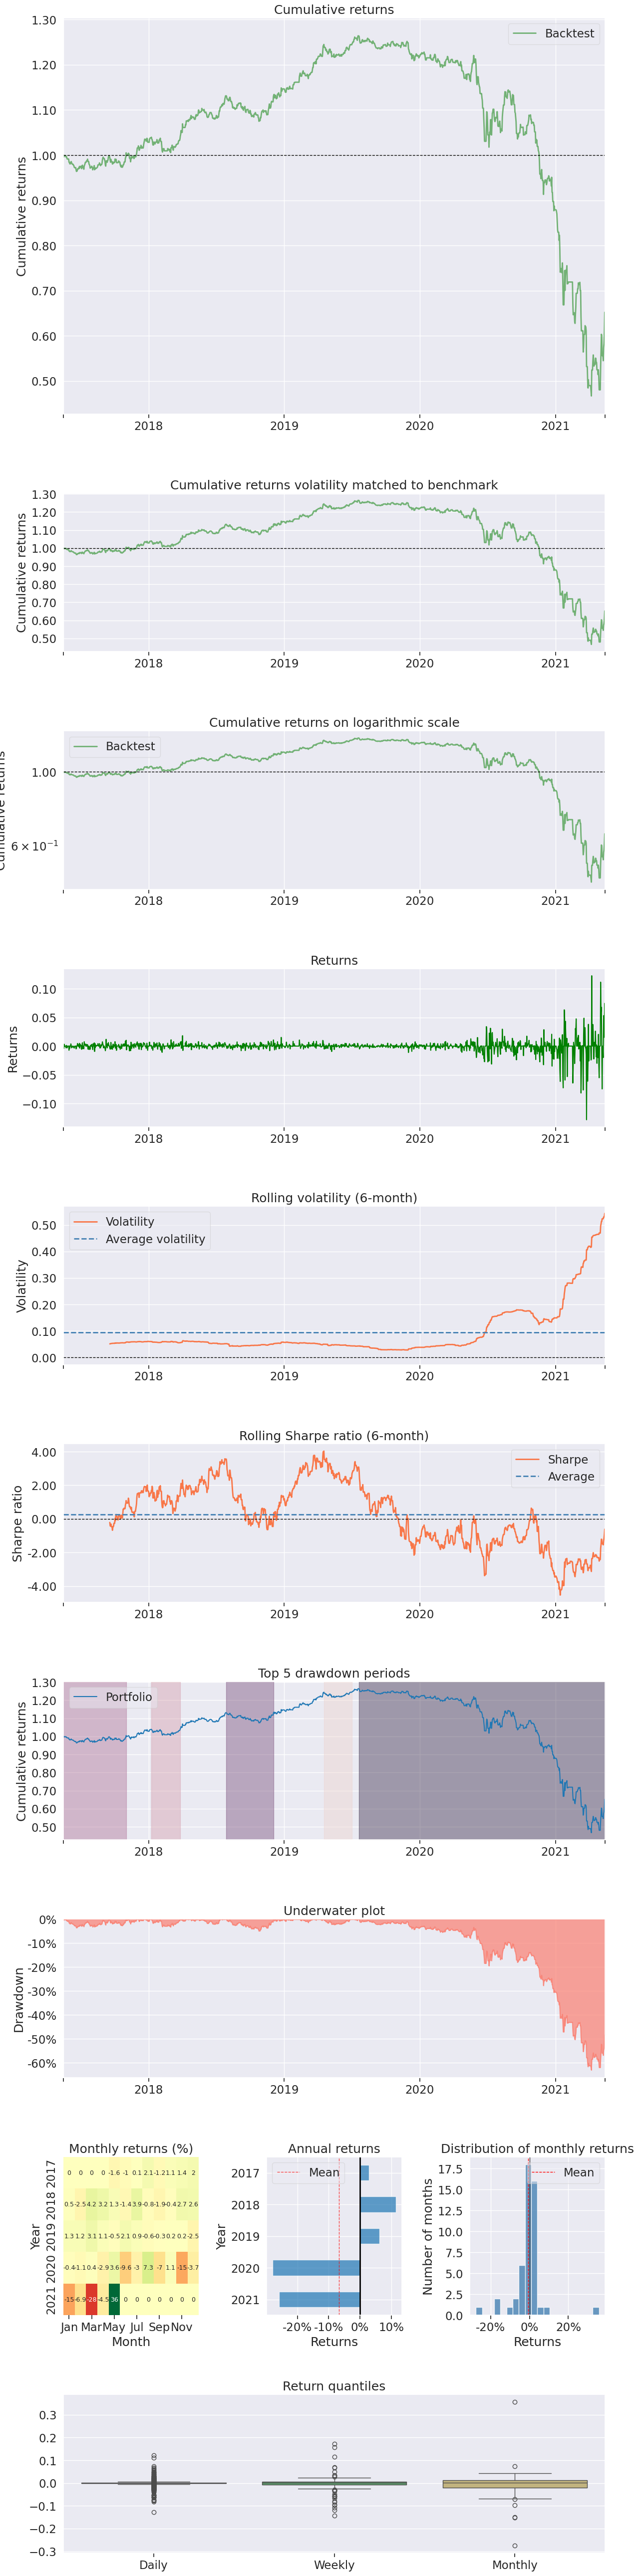

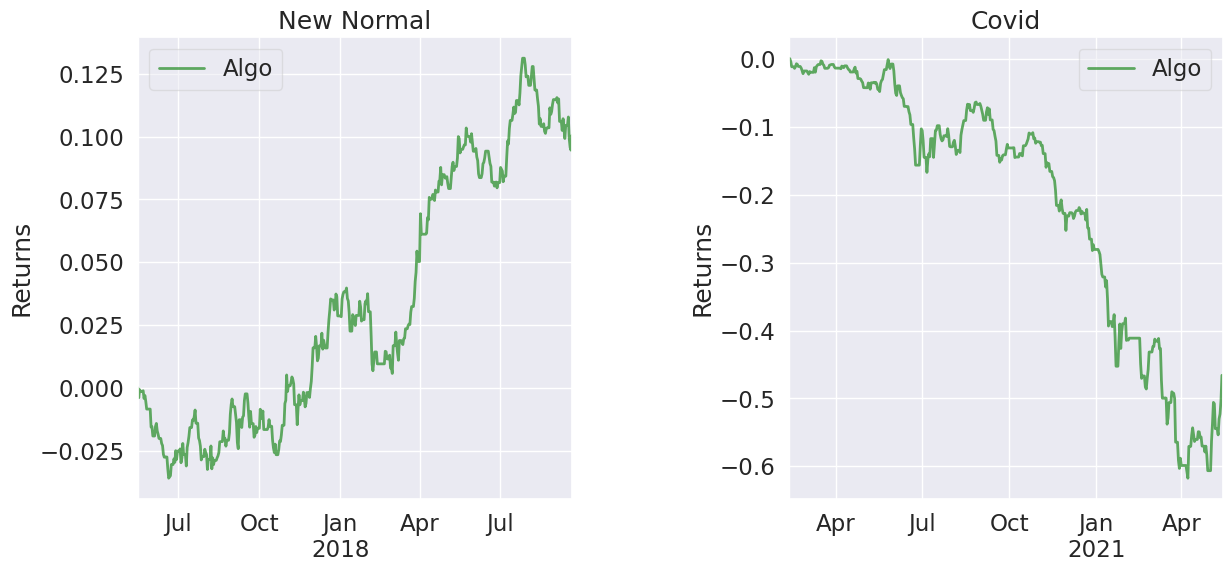

In [29]:
"""
如果還沒有安裝 backtrader 套件，先在終端機執行「pip install backtrader」
如果還沒有安裝 pyfolio 套件，先在終端機執行「pip install pyfolio-reloaded」
"""



chap1_utils.finlab_login()

# %%
analysis_period_start_date = "2017-05-16"
analysis_period_end_date = "2021-05-15"

# %%
top_N_stocks = chap1_utils.get_top_stocks_by_market_value(
    excluded_industry=[
        "金融業",
        "金融保險業",
        "存託憑證",
        "建材營造",
    ],
    pre_list_date="2017-01-03",
)


# %%
# 取得指定股票代碼列表在給定日期範圍內的每日 OHLCV 數據。
all_stock_data = chap1_utils.get_daily_OHLCV_data(
    stock_symbols=top_N_stocks,
    start_date=analysis_period_start_date,
    end_date=analysis_period_end_date,
)
all_stock_data["datetime"] = all_stock_data["datetime"].astype(str)
all_stock_data["asset"] = all_stock_data["asset"].astype(str)


# %%
# 指定各個季度下要使用來排序的因子。
# name 對應的是每個季度的因子名稱，
# corr 對應的是因子值與未來收益的關係(根據單因子Alphalens分析結果)。
select_rank_factor_dict = {
    "2017-Q1": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q2": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q3": {"name": "稅後淨利成長率", "corr": True},
    "2017-Q4": {"name": "稅後淨利成長率", "corr": True},
    "2018-Q1": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q2": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q3": {"name": "稅前淨利成長率", "corr": True},
    "2018-Q4": {"name": "稅前淨利成長率", "corr": True},
    "2019-Q1": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q2": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q3": {"name": "稅後淨利成長率", "corr": True},
    "2019-Q4": {"name": "稅後淨利成長率", "corr": True},
    "2020-Q1": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q2": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q3": {"name": "稅前淨利成長率", "corr": True},
    "2020-Q4": {"name": "稅前淨利成長率", "corr": True},
}


# %%
# 準備因子數據，將各季度的因子數據進行排序。
all_factor_data = pd.DataFrame()
for quarter, factor in select_rank_factor_dict.items():
    # 將季度字串轉換為起始和結束日期
    start_date, end_date = chap1_utils.convert_quarter_to_dates(quarter)
    # 生成該季度的交易日範圍
    trading_days = pd.date_range(start=start_date, end=end_date)
    # 取得因子數據，並按股票代碼和日期進行排序與填補
    quarter_factor_data = (
        chap1_utils.get_factor_data(
            stock_symbols=top_N_stocks,
            factor_name=factor["name"],
            trading_days=list(trading_days),
        )
        .reset_index()
        .assign(factor_name=factor["name"])
        .sort_values(by=["asset", "datetime"])
        .groupby("asset", group_keys=False)
        .apply(lambda group: group.ffill())
        .dropna()
    )
    # 根據因子值進行股票排序: 由小到大(positive_corr=True) or 由大到小(positive_corr=False)
    quarter_factor_data = chap1_utils.rank_stocks_by_factor(
        factor_df=quarter_factor_data,
        positive_corr=factor["corr"],  # 根據因子相關性決定排序方向
        rank_column="value",  # 用來排序的欄位名稱
        rank_result_column="rank",  # 儲存排序結果的欄位名稱
    ).drop(columns=["value"])
    # 合併該季度的因子數據
    all_factor_data = pd.concat([all_factor_data, quarter_factor_data])
# 重設索引並將日期與股票代碼轉換為字串格式
all_factor_data = all_factor_data.reset_index(drop=True)
all_factor_data["datetime"] = all_factor_data["datetime"].astype(str)
all_factor_data["asset"] = all_factor_data["asset"].astype(str)

# %%
# 將因子數據與股價數據進行合併
all_stock_and_factor_data = pd.merge(
    all_stock_data, all_factor_data, on=["datetime", "asset"], how="outer"
)
# 按股票代碼和日期排序，並填補遺失值
all_stock_and_factor_data = (
    all_stock_and_factor_data.sort_values(by=["asset", "datetime"])
    .groupby("asset", group_keys=False)
    .apply(lambda group: group.ffill())
    .reset_index(drop=True)
)


# %%
# 定義回測資料格式，新增排名資料
class PandasDataWithRank(bt.feeds.PandasData):
    params = (
        ("datetime", "datetime"),  # 日期欄位
        ("open", "Open"),  # 開盤價欄位
        ("high", "High"),  # 最高價欄位
        ("low", "Low"),  # 最低價欄位
        ("close", "Close"),  # 收盤價欄位
        ("volume", "Volume"),  # 成交量欄位
        ("rank", "rank"),  # 排名欄位
        ("openinterest", -1),  # 持倉量欄位（不使用）
    )
    # 新增因子排名這條數據線
    lines = ("rank",)


# %%
# 定義策略：根據因子排名買入和賣出股票
class FactorRankStrategy(bt.Strategy):
    # 策略參數：要買入和賣出的股票數量，及每檔股票的交易金額
    params = (
        ("buy_n", None),  # 需要買入的股票數量
        ("sell_n", None),  # 需要賣出的股票數量
        ("each_cash", None),  # 每檔股票交易的金額
    )

    def __init__(self):
        self.stocks = self.datas  # 將所有股票數據儲存在 self.stocks 變數中
        self.buy_positions = set()  # 記錄已買入的股票名稱
        self.sell_positions = set()  # 記錄已賣出的股票名稱

    def next(self):
        # 取得當天所有股票的因子排名: ex: {stock1: 1, stock2: 2}
        ranks = {data._name: data.rank[0] for data in self.stocks}
        # 根據排名從低到高排序: 排名越小的因子值越小, 排名越大的因子值越大
        sorted_ranks = sorted(ranks.items(), key=lambda x: x[1])

        # 取得排名最高的 buy_n 個股票（要買入的股票）
        if self.params.buy_n:
            buy_n_list = sorted_ranks[-self.params.buy_n :]
            buy_n_names = [name for name, rank in buy_n_list]  # 提取股票名稱

        # 取得排名最低的 sell_n 個股票（要賣出的股票）
        if self.params.sell_n:
            sell_n_list = sorted_ranks[: self.params.sell_n]
            sell_n_names = [name for name, rank in sell_n_list]  # 提取股票名稱

        # 進行買入與賣出操作
        for data in self.stocks:
            # 取得當前股票名稱
            name = data._name
            # 取得當前股票的收盤價
            close_price = data.close[0]
            # 計算每檔股票的交易股數
            size = int(self.params.each_cash / close_price)
            # 1. 處理賣出(做空)操作
            if self.params.sell_n:
                if name in self.sell_positions and name not in sell_n_names:
                    # 如果股票已賣出且不再賣出清單，則平倉
                    self.close(data)
                    self.sell_positions.remove(name)
                elif name not in self.sell_positions and name in sell_n_names:
                    # 如果股票在賣出清單中，則賣出
                    self.sell(data, size=size)
                    self.sell_positions.add(name)

            # 2. 處理買入(做多)操作
            if self.params.buy_n:
                if name in self.buy_positions and name not in buy_n_names:
                    # 如果股票已買入且不再買入清單，則平倉
                    self.close(data)
                    self.buy_positions.remove(name)
                elif name not in self.buy_positions and name in buy_n_names:
                    # 如果股票在買入清單中，則買入
                    self.buy(data, size=size)
                    self.buy_positions.add(name)


# %%
# 設定回測引擎
cerebro = bt.Cerebro()
# 加入交易策略 FactorRankStrategy，設定策略參數：
# buy_n: 每次要買入的股票數量（20檔）
# sell_n: 每次要賣出的股票數量（20檔）
# each_cash: 每檔股票的交易金額，這裡是總資金的90%除以40檔股票，確保每檔股票有足夠資金配置
cerebro.addstrategy(
    FactorRankStrategy, buy_n=20, sell_n=20, each_cash=2000_0000 * 0.9 / 40
)
# 依序加入每檔股票的數據到回測引擎中
stock_list = list(set(all_stock_and_factor_data["asset"]))
for stock in stock_list:
    data = all_stock_and_factor_data[all_stock_and_factor_data["asset"] == stock]
    data = data.drop(columns=["asset", "factor_name"])  # 移除不必要欄位
    data["datetime"] = pd.to_datetime(data["datetime"])  # 日期欄位轉為 datetime 格式
    data = data.dropna().sort_values(by=["datetime"]).reset_index(drop=True)
    data = PandasDataWithRank(dataname=data)  # 使用自訂的數據格式 PandasDataWithRank
    cerebro.adddata(data, name=stock)  # 加入數據到回測引擎
# 設定初始資金為 2000 萬元
cerebro.broker.set_cash(2000_0000)
# 設定每筆交易的手續費為 0.1%
cerebro.broker.setcommission(commission=0.001)
# 加入 PyFolio 分析器，用於生成投資組合的性能分析報告
cerebro.addanalyzer(bt.analyzers.PyFolio)
# 運行策略
results = cerebro.run()

# %%
# 取得策略結果並生成投資組合分析報告
strat = results[0]  # 取得回測結果中的第一個策略
pyfoliozer = strat.analyzers.getbyname("pyfolio")
(
    returns,
    positions,
    transactions,
    gross_lev,
) = pyfoliozer.get_pf_items()
# 使用 PyFolio 生成完整的投資組合表現分析報告
pf.create_full_tear_sheet(returns)

# %%